In [1]:
#   photometric redshift of Blue Jay catalog from NIRCam data + 3D HST data
import numpy as np
import eazy
import warnings

In [12]:
#parameters!
#---------------------------------------------------------
#   CONSTRUCT THE PARAMETERS DICTIONARY
params = {}

#files in inputs and outputs
params['CATALOG_FILE'] = 'inputs/phot_cat_norm_3dhst.cat' 
params['OUTPUT_DIRECTORY'] = 'outputs'
params['MAIN_OUTPUT_FILE'] = 'outputs/bluejay_photz_3dhst'

# Galactic extinction
params['MW_EBV'] = 0.0195 #median extinction in the COSMOS field
params['CAT_HAS_EXTCORR'] = False

params['Z_STEP'] = 0.01
params['Z_MIN'] = .01
params['Z_MAX'] = 7.

#template file (following Weaver2024) 
params['TEMPLATES_FILE'] = 'templates/sfhz/corr_sfhz_13.param'

# following Weaver 2024 apply 5% error!!
params['SYS_ERR'] = 0.05

params['APPLY_IGM'] = 1             # Apply Madau 1995 IGM absorption
params['SCALE_2175_BUMP'] = 0.000   # Scaling of 2175A bump.  Values 0.13 (0.27) absorb ~10 (20) % at peak.

params['FIX_ZSPEC'] = False
params['PRIOR_ABZP'] = 25.0

params['REST_FILTERS'] = [153,154,155,161,162,163]
params['Z_COLUMN'] = 'z_peak'

translate_file = 'inputs/zphot_norm_3dhst.translate'

In [3]:
#   INITIALIZE PHOTOZ OBJECT
self = eazy.photoz.PhotoZ(param_file=None, translate_file=translate_file, zeropoint_file=None,
                          params=params, load_prior=False, load_products=False,n_proc=4)

Read default param file: /home/letizia/.local/lib/python3.10/site-packages/eazy/data/zphot.param.default
Read CATALOG_FILE: inputs/phot_cat_norm_3dhst.cat
   >>> NOBJ = 153
F_F090W E_F090W (363): jwst_nircam_f090w
F_F115W E_F115W (364): jwst_nircam_f115w
F_F150W E_F150W (365): jwst_nircam_f150w
F_F200W E_F200W (366): jwst_nircam_f200w
F_F277W E_F277W (375): jwst_nircam_f277w
F_F356W E_F356W (376): jwst_nircam_f356w
F_F410M E_F410M (383): jwst_nircam_f410m
F_F444W E_F444W (377): jwst_nircam_f444w
F_F814W E_F814W (239): hst/ACS_update_sep07/wfc_f814w_t81.dat
F_F606W E_F606W (236): hst/ACS_update_sep07/wfc_f606w_t81.dat
F_IRAC1 E_IRAC1 ( 18): IRAC/irac_tr1_2004-08-09.dat
F_IRAC2 E_IRAC2 ( 19): IRAC/irac_tr2_2004-08-09.dat
F_IRAC3 E_IRAC3 ( 20): IRAC/irac_tr3_2004-08-09.dat
F_IRAC4 E_IRAC4 ( 21): IRAC/irac_tr4_2004-08-09.dat
F_F125W E_F125W (203): hst/wfc3/IR/f125w.dat
F_F140W E_F140W (204): hst/wfc3/IR/f140w.dat
F_F160W E_F160W (205): hst/wfc3/IR/f160w.dat
F_UVISTA_Y E_UVISTA_Y (256): VIS

100%|███████████████████████████████████████████| 13/13 [03:27<00:00, 16.00s/it]


Template   0: corr_sfhz_13_bin0_av0.01.fits (NZ=14).
Template   1: corr_sfhz_13_bin0_av0.25.fits (NZ=14).
Template   2: corr_sfhz_13_bin0_av0.50.fits (NZ=14).
Template   3: corr_sfhz_13_bin0_av1.00.fits (NZ=14).
Template   4: corr_sfhz_13_bin1_av0.01.fits (NZ=14).
Template   5: corr_sfhz_13_bin1_av0.25.fits (NZ=14).
Template   6: corr_sfhz_13_bin1_av0.50.fits (NZ=14).
Template   7: corr_sfhz_13_bin1_av1.00.fits (NZ=14).
Template   8: corr_sfhz_13_bin2_av0.01.fits (NZ=14).
Template   9: corr_sfhz_13_bin2_av0.50.fits (NZ=14).
Template  10: corr_sfhz_13_bin2_av1.00.fits (NZ=14).
Template  11: corr_sfhz_13_bin3_av0.01.fits (NZ=14).
Template  12: corr_sfhz_13_bin3_av0.50.fits (NZ=14).
Process templates: 208.440 s


207it [00:00, 11610.80it/s]


In [4]:
# fit_parallel renamed to fit_catalog 14 May 2021
self.fit_catalog(self.idx, n_proc=4)

# Derived parameters (z params, RF colors, masses, SFR, etc.)
warnings.simplefilter('ignore', category=RuntimeWarning)
zout, hdu = self.standard_output(simple=False,
                                 rf_pad_width=0.5, rf_max_err=2,
                                 prior=False, beta_prior=False,
                                 UBVJ=[153,154,155,161,162,163],
                                 absmag_filters=[],
                                 extra_rf_filters=[])


100%|████████████████████████████████████████| 207/207 [00:00<00:00, 368.48it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=152)
Fit 0.6 s (n_proc=4, NOBJ=153)
Get best fit coeffs & best redshifts
fit_best: 0.1 s (n_proc=1,  NOBJ=152)
Get parameters (UBVJ=[153, 154, 155, 161, 162, 163], simple=False)


100%|█████████████████████████████████████████| 152/152 [00:02<00:00, 64.81it/s]


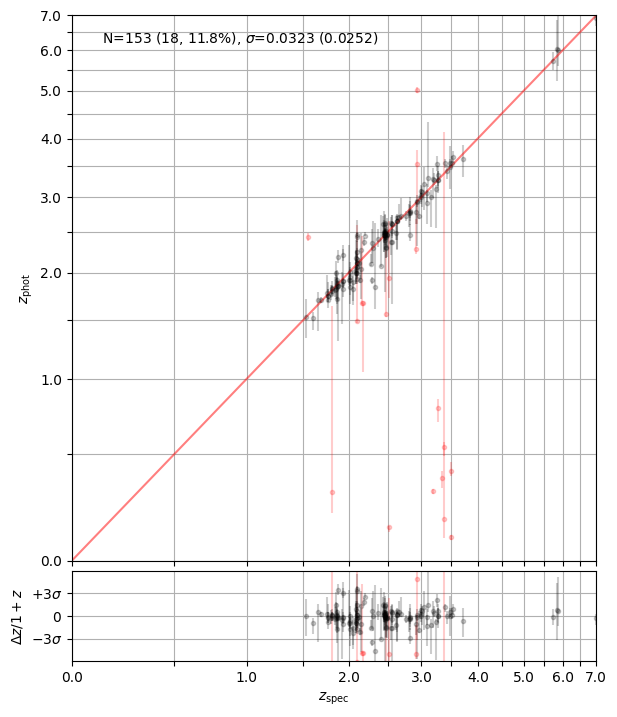

In [5]:
fig = self.zphot_zspec(zmin=0., zmax=7.,)

Text(0, 0.5, '$(U-V)_0$')

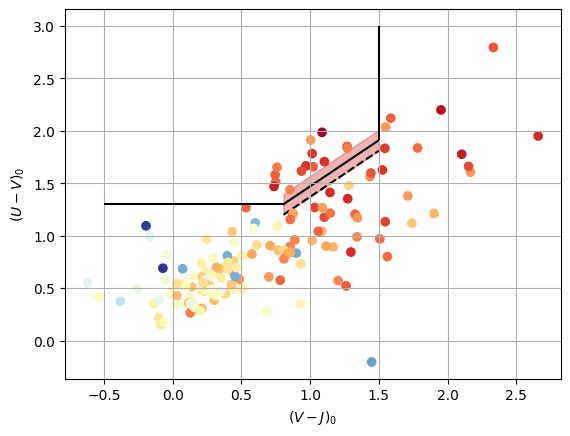

In [6]:
# Show UVJ diagram
import matplotlib.pyplot as plt

x = np.linspace((1.3-0.59)/0.88,1.5)
y = x*0.88 + 0.59

#x_l = np.linspace((1.3-0.49)/0.88,1.5)
t = x[-1]+0.1/0.88
x_l = np.linspace(x[0],1.5)
y_l = x_l*0.88 + 0.49
y_h = x_l * 0.88 + 0.69


uv = -2.5*np.log10(zout['restU']/zout['restV'])
vj = -2.5*np.log10(zout['restV']/zout['restJ'])
ssfr = zout['sfr']/zout['mass']
plt.grid()
sel = (zout['z_phot'] > 0.1) & (zout['z_phot'] < 7)
plt.scatter(vj[sel], uv[sel], c=np.log10(zout['mass'])[sel], 
             cmap='RdYlBu_r')

plt.plot(x,y, color='black',linewidth=1.5,zorder=0)
plt.plot(x_l,y_l, color='black',ls='--',linewidth=1.5,zorder=0)
plt.fill_between(x_l,y_h,y_l,color='C3',alpha=0.35,zorder=-1)
#plt.plot(x_l,y_h, color='#ff3809',alpha=0.75,ls='--',linewidth=3.,zorder=0)
plt.vlines(x=1.5,ymin=max(y),ymax=3.,color='black',linewidth=1.5)
plt.hlines(y=1.3,xmax=min(x),xmin=-.5,color='black',linewidth=1.5)

#plt.xlim(-0.2, 2.3); plt.ylim(0, 2.4); 
plt.xlabel(r'$(V-J)_0$'); plt.ylabel(r'$(U-V)_0$') 


Text(0, 0.5, '$(U-V)_0$')

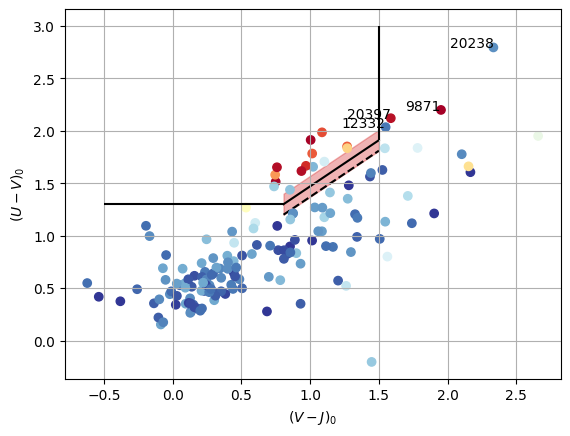

In [7]:
# Show UVJ diagram
import matplotlib.pyplot as plt

x = np.linspace((1.3-0.59)/0.88,1.5)
y = x*0.88 + 0.59

#x_l = np.linspace((1.3-0.49)/0.88,1.5)
t = x[-1]+0.1/0.88
x_l = np.linspace(x[0],1.5)
y_l = x_l*0.88 + 0.49
y_h = x_l * 0.88 + 0.69


uv = -2.5*np.log10(zout['restU']/zout['restV'])
vj = -2.5*np.log10(zout['restV']/zout['restJ'])
ssfr = zout['sfr']/zout['mass']
plt.grid()
sel = (zout['z_phot'] > 0.1) & (zout['z_phot'] < 7)
plt.scatter(vj[sel], uv[sel], c=np.log10(ssfr)[sel], 
            vmin=-13, vmax=-8, cmap='RdYlBu')

plt.plot(x,y, color='black',linewidth=1.5,zorder=0)
plt.plot(x_l,y_l, color='black',ls='--',linewidth=1.5,zorder=0)
plt.fill_between(x_l,y_h,y_l,color='C3',alpha=0.35,zorder=-1)
#plt.plot(x_l,y_h, color='#ff3809',alpha=0.75,ls='--',linewidth=3.,zorder=0)
plt.vlines(x=1.5,ymin=max(y),ymax=3.,color='black',linewidth=1.5)
plt.hlines(y=1.3,xmax=min(x),xmin=-.5,color='black',linewidth=1.5)

for i in range(len(zout)):
    if uv[i]>2. and vj[i]>1.5:
        plt.annotate(str(zout['id'][i]),(vj[i],uv[i]),ha='right')

#plt.xlim(-0.2, 2.3); plt.ylim(0, 2.4); 
plt.xlabel(r'$(V-J)_0$'); plt.ylabel(r'$(U-V)_0$') 


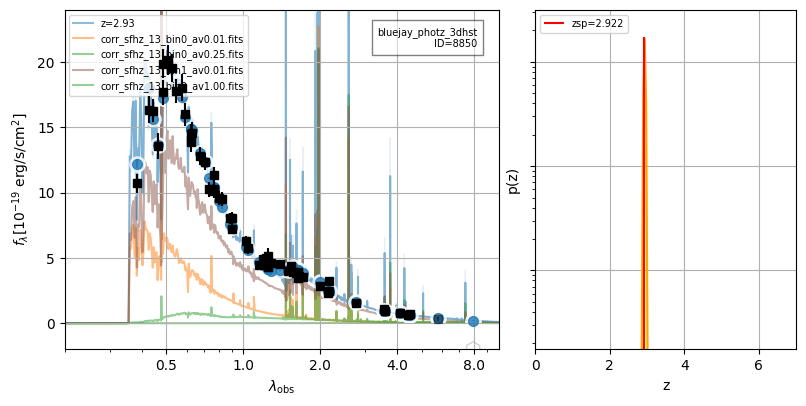

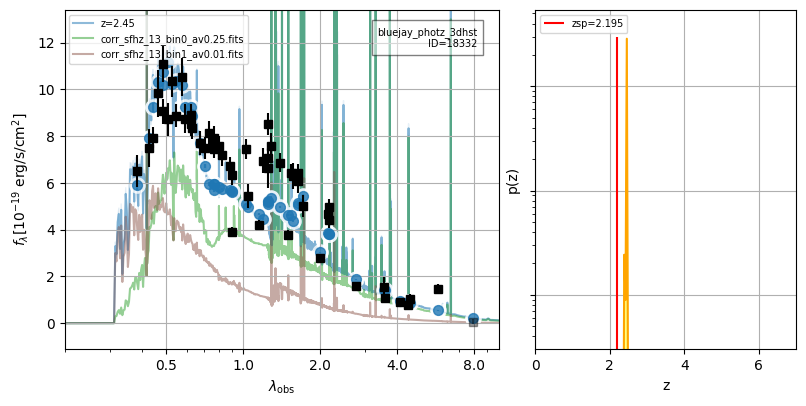

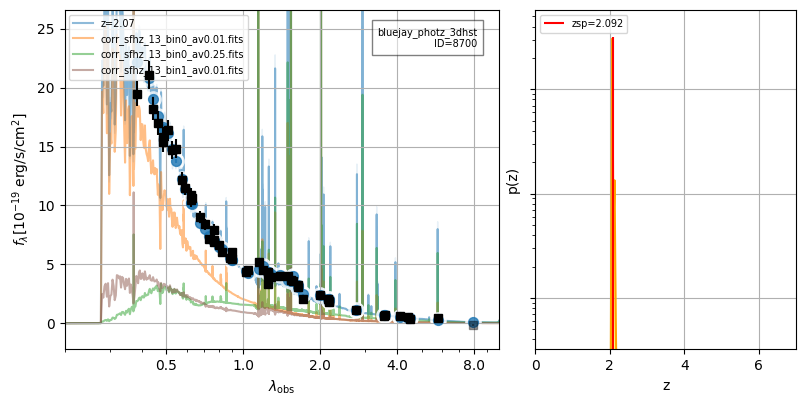

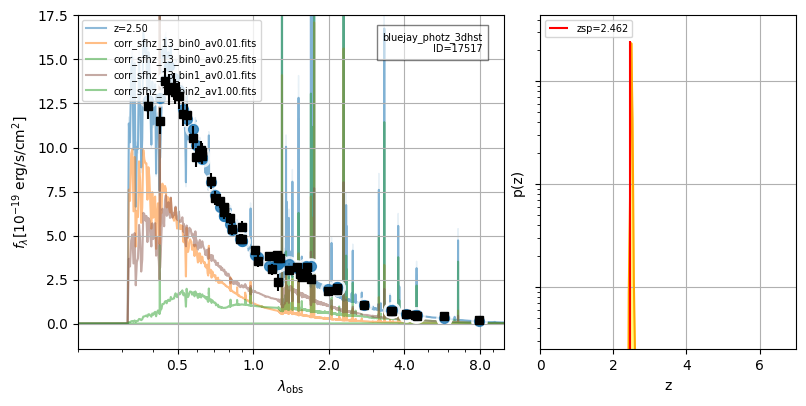

In [8]:
# Show brightest objects with z_spec > 1

ifilter = self.flux_columns[np.argmin((self.lc - 8140)**2)]

imag = params['PRIOR_ABZP'] - 2.5*np.log10(self.cat[ifilter])
sel = (self.ZSPEC > 1.1)

so = np.argsort(imag[sel])
ids = self.OBJID[sel][so]

for i in range(4):
    fig, data = self.show_fit(ids[i], xlim=[0.2, 10], show_components=True,
                              logpz=True, zr=[0,7])

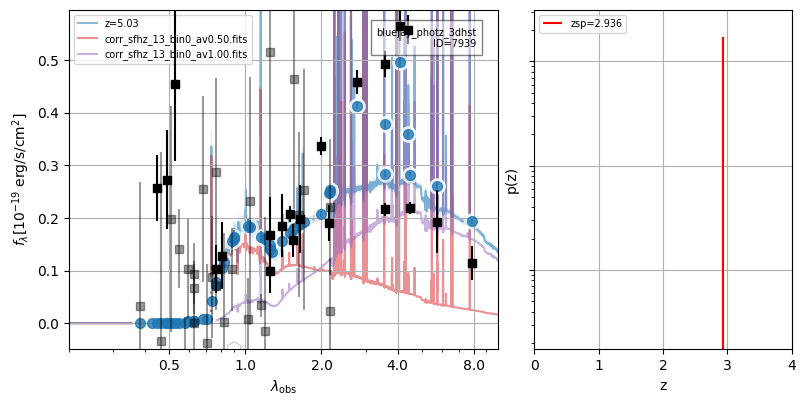

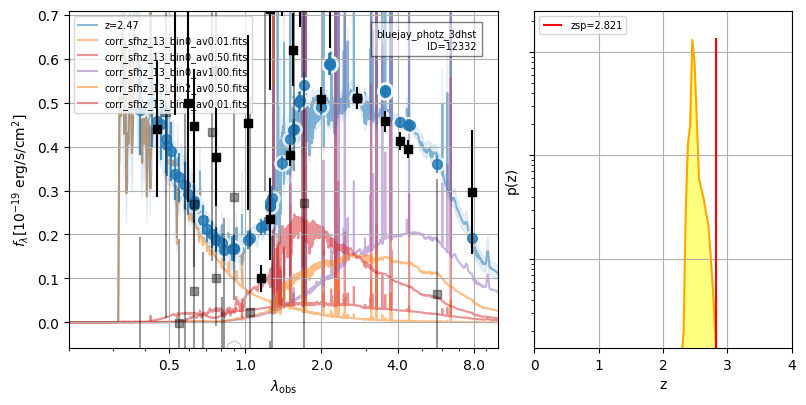

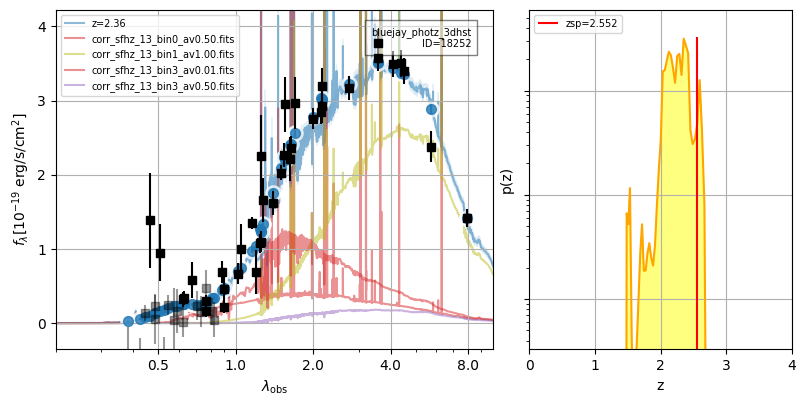

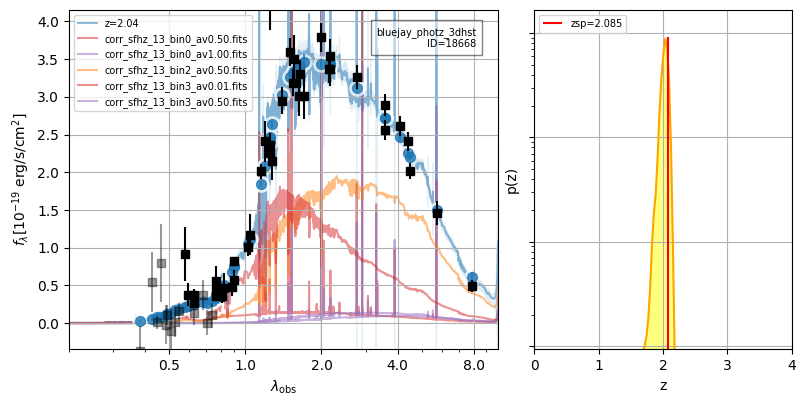

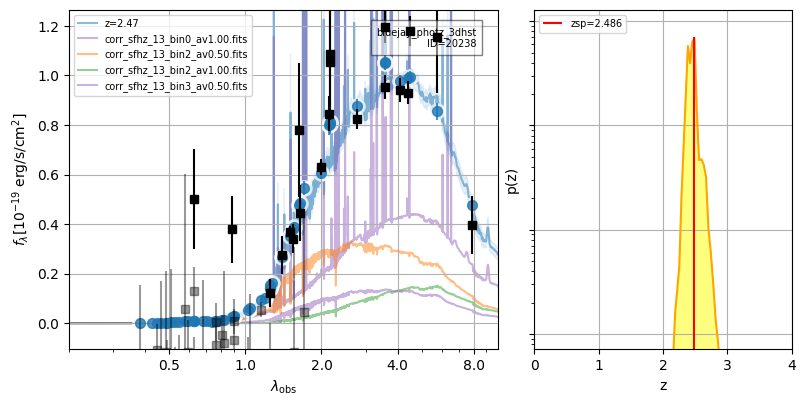

In [9]:
# show strange galaxies
strange = [20238, 12332, 18668, 18252, 7939]

ifilter = []
for i,ids in enumerate(self.OBJID):
    if ids in strange: ifilter.append(i)  
ifilter = np.array(ifilter)

strange_gals = self.cat[ifilter]

ids = strange_gals['id']

for i in range(len(ifilter)):
    fig, data = self.show_fit(ids[i], xlim=[0.2, 10], show_components=True,
                              logpz=True, zr=[0,4])

In [10]:
import dash
import os

In [11]:
import eazy.visualization
from importlib import reload
reload(eazy.visualization)

'''zout['jh'] = (-2.5*np.log10(self.cat['FJ1']/self.cat['FHs'])) #.filled(-1.)
zout['hk'] = (-2.5*np.log10(self.cat['FHs']/self.cat['FKs'])) #.filled(-1.)

bband = self.flux_columns[np.nanargmin((self.lc - 4500)**2)]
zband = self.flux_columns[np.nanargmin((self.lc - 9000)**2)]
zout['Bz'] = (-2.5*np.log10(self.cat[bband]/self.cat[zband])) #.filled(-1.)
zout['zK'] = (-2.5*np.log10(self.cat[zband]/self.cat['FKs'])) #.filled(-1.)

extra_plots = {
               'JH-redshift': ('z_phot','jh','z<sub>phot</sub>', '(J1-Hs)<sub>obs</sub>', (0, 4), (-0.1, 1.9)),
               'HK-redshift': ('z_phot','hk','z<sub>phot</sub>', '(Hs-Ks)<sub>obs</sub>', (0, 4), (-0.1, 1.9)),
               'BzK': ('Bz','zK',f'{bband} - {zband}', f'{zband} - K<sub>s</sub>', (-0.5, 5), (-0.5, 5)),
              }

for c in ['jh','hk', 'zK','Bz']:
    if hasattr(zout[c], 'mask'):
        zout[c].fill_value = -1.
    
sel = (zf['Use'] > -1)'''

vis = eazy.visualization.EazyExplorer(self, zout)

if 1:
    app = vis.make_dash_app(server_mode='inline', plot_height=450,
                        infer_proxy=os.getcwd().startswith('/content'))

/home/letizia/.local/lib/python3.10/site-packages/dash/dash.py:550: UserWarning:

JupyterDash is deprecated, use Dash instead.
See https://dash.plotly.com/dash-in-jupyter for more details.



---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
File ~/.local/lib/python3.10/site-packages/eazy/visualization.py:1036, in EazyExplorer.make_dash_app.<locals>.update_sample_scatter(
    dff=        id  nusefilt        uv        vj       s...     True        False  

[143 rows x 67 columns],
    xcol='z_spec',
    ycol='z_phot',
    x_label='z<sub>spec</sub>',
    y_label='z<sub>phot</sub>',
    x_range=(0, 4.5),
    y_range=(0, 4.5),
    extra={},
    color_kwargs={'color': 0      -8.532581
1     -10.156015
2      -8.6865...-8.626137
Name: ssfr, Length: 143, dtype: float64, 'color_continuous_scale': 'portland_r'}
)
   1034 # print('update_sample_scatter xxx', xcol, len(dff[xcol]))
   1035 is_sel = dff['in_selectedData']
-> 1036 fig = px.scatter(data_frame=dff[is_sel], x=xcol, y=ycol, 
        is_sel = 0      True
1      True
2      True
3      True
4      True
       ... 
148    True


In [5]:
#now try with z_spec...
params['FIX_ZSPEC'] = True
params['MAIN_OUTPUT_FILE'] = 'outputs/bluejay_photz_hst_zspec'

self = eazy.photoz.PhotoZ(param_file=None, translate_file=translate_file, zeropoint_file=None,
                          params=params, load_prior=False, load_products=False,n_proc=4)


Read default param file: /home/letizia/.local/lib/python3.10/site-packages/eazy/data/zphot.param.default
Read CATALOG_FILE: inputs/phot_cat.cat
   >>> NOBJ = 153
f_F090W e_F090W (363): jwst_nircam_f090w
f_F115W e_F115W (364): jwst_nircam_f115w
f_F150W e_F150W (365): jwst_nircam_f150w
f_F200W e_F200W (366): jwst_nircam_f200w
f_F277W e_F277W (375): jwst_nircam_f277w
f_F356W e_F356W (376): jwst_nircam_f356w
f_F410M e_F410M (383): jwst_nircam_f410m
f_F444W e_F444W (377): jwst_nircam_f444w
f_F125W e_F125W (203): hst/wfc3/IR/f125w.dat
f_F140W e_F140W (204): hst/wfc3/IR/f140w.dat
f_F160W e_F160W (205): hst/wfc3/IR/f160w.dat
f_F606W e_F606W (236): hst/ACS_update_sep07/wfc_f606w_t81.dat
f_F814W e_F814W (239): hst/ACS_update_sep07/wfc_f814w_t81.dat
Set sys_err = 0.05 (positive=True)
Template grid: templates/sfhz/corr_sfhz_13.param (this may take some time)


100%|███████████████████████████████████████████| 13/13 [01:45<00:00,  8.08s/it]


Template   0: corr_sfhz_13_bin0_av0.01.fits (NZ=14).
Template   1: corr_sfhz_13_bin0_av0.25.fits (NZ=14).
Template   2: corr_sfhz_13_bin0_av0.50.fits (NZ=14).
Template   3: corr_sfhz_13_bin0_av1.00.fits (NZ=14).
Template   4: corr_sfhz_13_bin1_av0.01.fits (NZ=14).
Template   5: corr_sfhz_13_bin1_av0.25.fits (NZ=14).
Template   6: corr_sfhz_13_bin1_av0.50.fits (NZ=14).
Template   7: corr_sfhz_13_bin1_av1.00.fits (NZ=14).
Template   8: corr_sfhz_13_bin2_av0.01.fits (NZ=14).
Template   9: corr_sfhz_13_bin2_av0.50.fits (NZ=14).
Template  10: corr_sfhz_13_bin2_av1.00.fits (NZ=14).
Template  11: corr_sfhz_13_bin3_av0.01.fits (NZ=14).
Template  12: corr_sfhz_13_bin3_av0.50.fits (NZ=14).
Process templates: 105.511 s


207it [00:00, 13011.93it/s]


In [6]:
# fit_parallel renamed to fit_catalog 14 May 2021
self.fit_catalog(self.idx, n_proc=4)

# Derived parameters (z params, RF colors, masses, SFR, etc.)
warnings.simplefilter('ignore', category=RuntimeWarning)
zout, hdu = self.standard_output(simple=False,
                                 rf_pad_width=0.5, rf_max_err=2,
                                 prior=False, beta_prior=False,
                                 UBVJ=[153,154,155,161,162,163],
                                 absmag_filters=[],
                                 extra_rf_filters=[])

100%|████████████████████████████████████████| 207/207 [00:00<00:00, 255.42it/s]


Compute best fits
fit_best: 0.1 s (n_proc=1,  NOBJ=152)
Fit 1.0 s (n_proc=4, NOBJ=153)
Get best fit coeffs & best redshifts
fit_best: 0.1 s (n_proc=1,  NOBJ=152)
Get parameters (UBVJ=[153, 154, 155, 161, 162, 163], simple=False)


100%|████████████████████████████████████████| 152/152 [00:01<00:00, 101.35it/s]


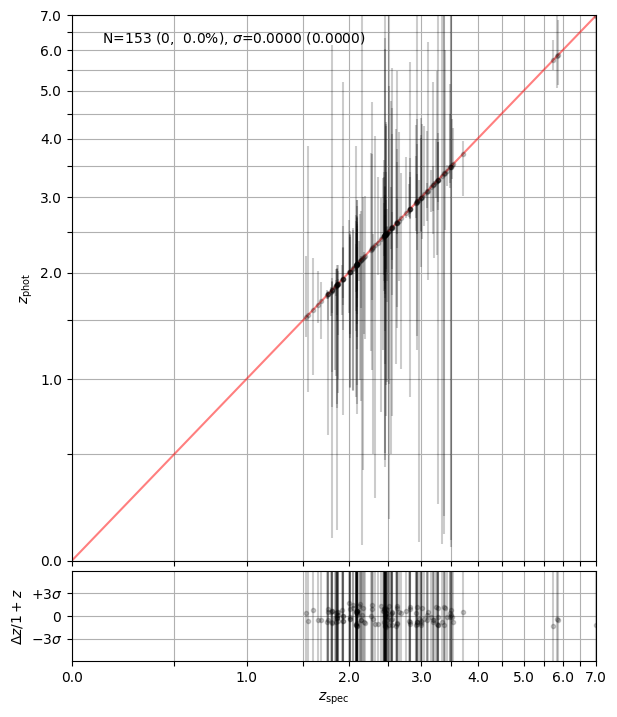

In [7]:
fig = self.zphot_zspec(zmin=0., zmax=7.,)

Text(0, 0.5, '$(U-V)_0$')

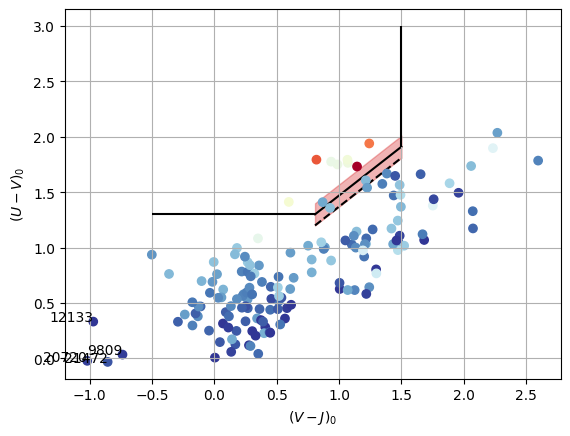

In [14]:
# Show UVJ diagram
import matplotlib.pyplot as plt

x = np.linspace((1.3-0.59)/0.88,1.5)
y = x*0.88 + 0.59

#x_l = np.linspace((1.3-0.49)/0.88,1.5)
t = x[-1]+0.1/0.88
x_l = np.linspace(x[0],1.5)
y_l = x_l*0.88 + 0.49
y_h = x_l * 0.88 + 0.69


uv = -2.5*np.log10(zout['restU']/zout['restV'])
vj = -2.5*np.log10(zout['restV']/zout['restJ'])
ssfr = zout['sfr']/zout['mass']
plt.grid()
sel = (zout['z_phot'] > 0.1) & (zout['z_phot'] < 7)
plt.scatter(vj[sel], uv[sel], c=np.log10(ssfr)[sel], 
             cmap='RdYlBu')

plt.plot(x,y, color='black',linewidth=1.5,zorder=0)
plt.plot(x_l,y_l, color='black',ls='--',linewidth=1.5,zorder=0)
plt.fill_between(x_l,y_h,y_l,color='C3',alpha=0.35,zorder=-1)
#plt.plot(x_l,y_h, color='#ff3809',alpha=0.75,ls='--',linewidth=3.,zorder=0)
plt.vlines(x=1.5,ymin=max(y),ymax=3.,color='black',linewidth=1.5)
plt.hlines(y=1.3,xmax=min(x),xmin=-.5,color='black',linewidth=1.5)

strange = []
for i in range(len(zout)):
    if uv[i]<.5 and vj[i]<-.5:
        strange.append(zout['id'][i])
        plt.annotate(str(zout['id'][i]),(vj[i],uv[i]),ha='right')

#plt.xlim(-0.2, 2.3); plt.ylim(0, 2.4); 
plt.xlabel(r'$(V-J)_0$'); plt.ylabel(r'$(U-V)_0$') 


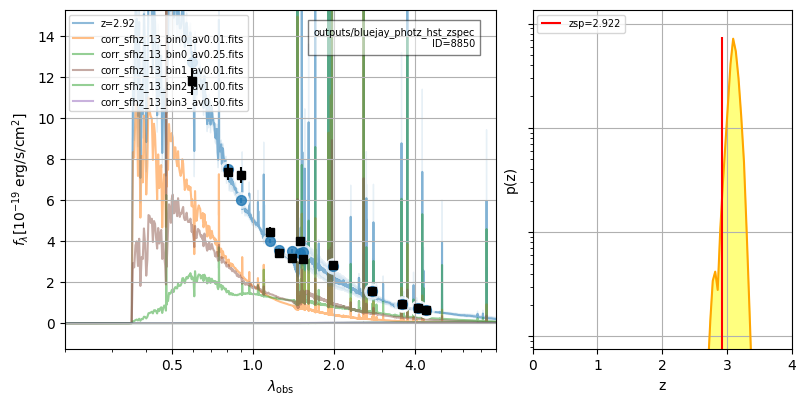

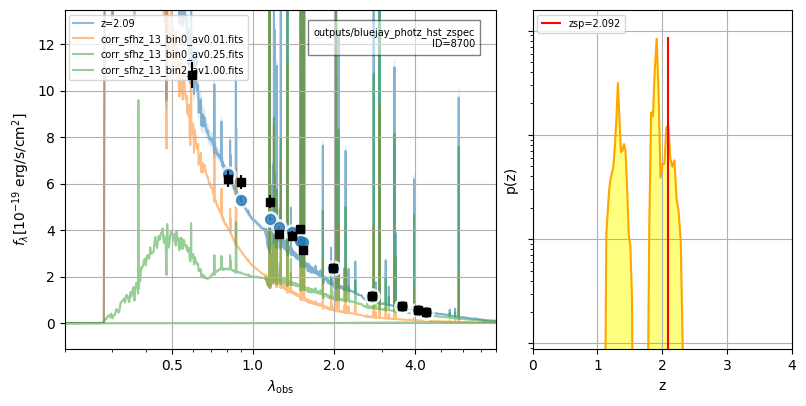

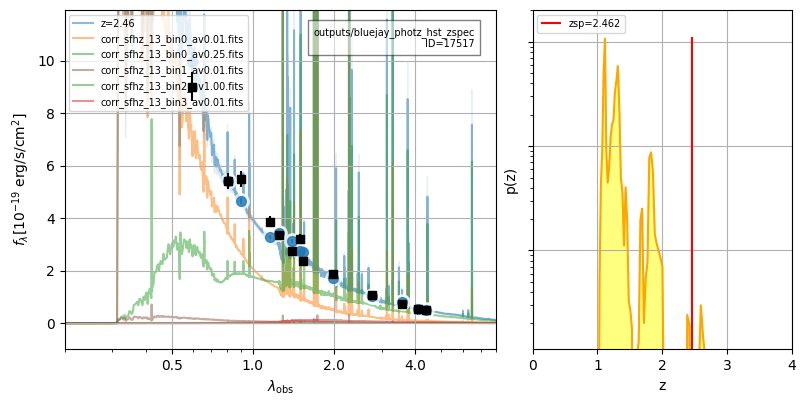

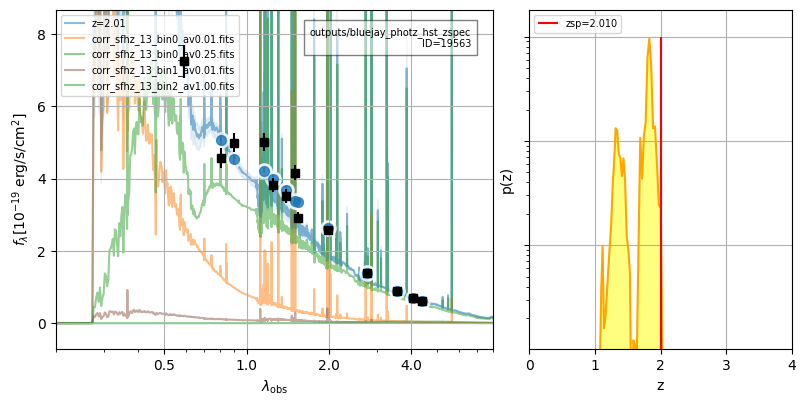

In [10]:
# Show brightest objects with z_spec > 1

ifilter = self.flux_columns[np.argmin((self.lc - 8140)**2)]

imag = params['PRIOR_ABZP'] - 2.5*np.log10(self.cat[ifilter])
sel = (self.ZSPEC > 1.1)

so = np.argsort(imag[sel])
ids = self.OBJID[sel][so]

for i in range(4):
    fig, data = self.show_fit(ids[i], xlim=[0.2, 8], show_components=True,
                              logpz=True, zr=[0,4])

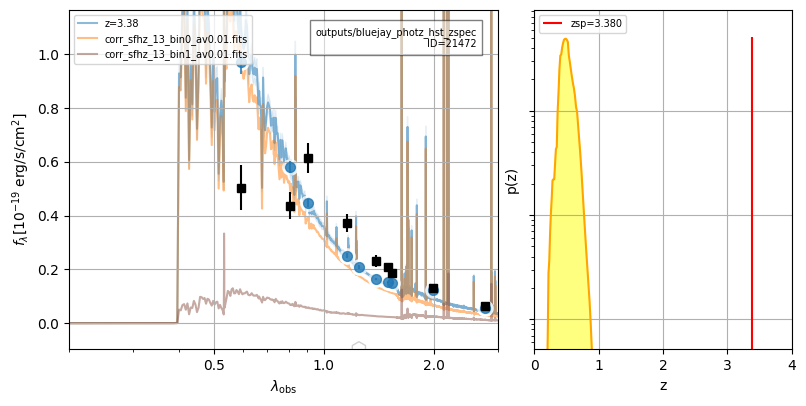

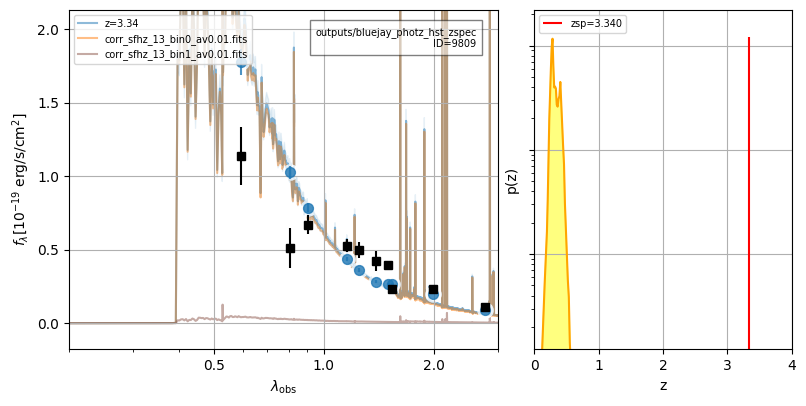

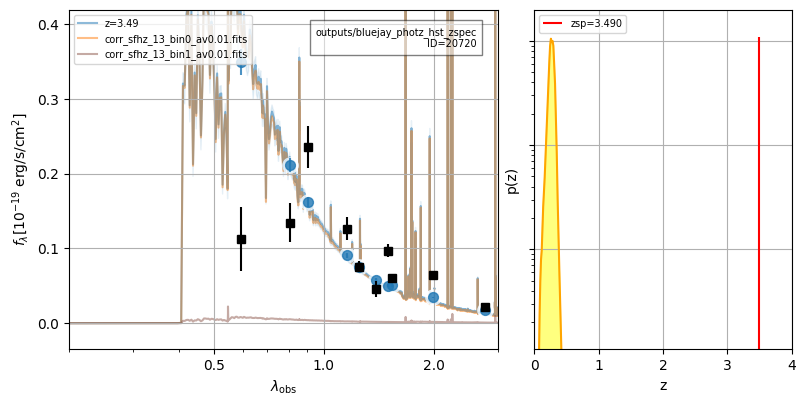

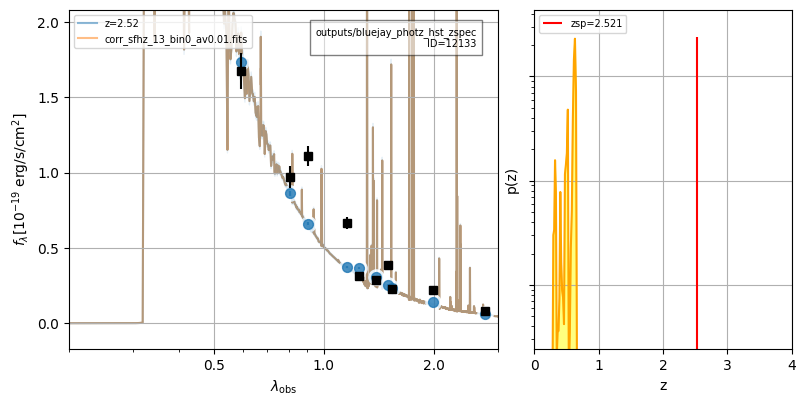

In [15]:
# show strange galaxies

ifilter = []
for i,ids in enumerate(self.OBJID):
    if ids in strange: ifilter.append(i)  
ifilter = np.array(ifilter)

strange_gals = self.cat[ifilter]

ids = strange_gals['id']

for i in range(len(ifilter)):
    fig, data = self.show_fit(ids[i], xlim=[0.2, 3], show_components=True,
                              logpz=True, zr=[0,4])